In [2]:
import seabird
import datetime
import numpy as np
import seapy
import gsw

In [2]:
ctd_file = '/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/KODC_YS.txt'
ctd_id = open(ctd_file)




In [3]:
ctd_id.readline()

'癤�Area\tLine\tStation\tDate(YYYY-MM-DD)\tLatitude\tLongitude\tVertical change chart\tDepth(m)\tWater Temperature(℃)\tT QC flag\tSalinity(psu)\tS QC flag\tDO(ml/L)\tD QC flag\tQC Level\tPO４(μmol/L)\tNO２(μmol/L)\tNO３(μmol/L)\tSiO２(μmol/L)\tpH\tWater Transparency(m)\tBaro(hPa)\tResearch Vessel\n'

In [4]:

line= ctd_id.readlines()

In [5]:
line = [iline.split('\t') for iline in line]

In [6]:
iline = 0
irecord = 1
for crt_line in line:
    if iline == 0:
        kodc_record = [irecord,]
        kodc_line = [float(crt_line[1]),]
        kodc_station = [float(crt_line[2]),]
        kodc_time = (datetime.datetime.strptime(crt_line[3],'%Y-%m-%d %H:%M') - 
                                              datetime.datetime(1970,1,1)).total_seconds()/3600/24
        kodc_lat = float(crt_line[4])
        kodc_lon = float(crt_line[5])
        kodc_depth = float(crt_line[7])
        kodc_temp = float(crt_line[8])
        kodc_tqc = float(crt_line[9])
        kodc_salt = float(crt_line[10])
        kodc_sqc = float(crt_line[11])
        
    else:
        if kodc_line[-1] != float(crt_line[1]): irecord+=1
        kodc_record = np.r_[kodc_record,irecord]
        kodc_line = np.r_[kodc_line,float(crt_line[1])]
        kodc_station = np.r_[kodc_station,float(crt_line[2])]
        kodc_time = np.r_[kodc_time, (datetime.datetime.strptime(crt_line[3],'%Y-%m-%d %H:%M') - 
                                              datetime.datetime(1970,1,1)).total_seconds()/3600/24]
        kodc_lat = np.r_[kodc_lat,float(crt_line[4])]
        kodc_lon = np.r_[kodc_lon,float(crt_line[5])]
        kodc_depth = np.r_[kodc_depth, float(crt_line[7])]
        kodc_temp = np.r_[kodc_temp, float(crt_line[8])]
        kodc_tqc = np.r_[kodc_tqc,float(crt_line[9])]
        kodc_salt = np.r_[kodc_salt, float(crt_line[10])]
        kodc_sqc = np.r_[kodc_sqc,float(crt_line[11])]
        
        
    iline+=1

In [100]:
kodc_record.shape

(10343,)

In [7]:
for iline in [107.,106.,105.,104.,103.,102.,209.,208.,207.]:
    exclude_pos = np.where(kodc_line != iline)
    kodc_record = kodc_record[exclude_pos]
    kodc_station = kodc_station[exclude_pos]
    kodc_time = kodc_time[exclude_pos]
    kodc_lat = kodc_lat[exclude_pos]
    kodc_lon = kodc_lon[exclude_pos]
    kodc_depth = kodc_depth[exclude_pos]
    kodc_temp = kodc_temp[exclude_pos]
    kodc_tqc = kodc_tqc[exclude_pos]
    kodc_salt = kodc_salt[exclude_pos]
    kodc_sqc = kodc_sqc[exclude_pos]
    kodc_line =kodc_line[exclude_pos]

In [117]:
np.sum(kodc_record==1)

43

In [4]:
datetime.datetime(1970,1,1)+datetime.timedelta(16009)

datetime.datetime(2013, 10, 31, 0, 0)

In [115]:
position  = [ (i,j) for i,j in zip(kodc_lon,kodc_lat)]

In [117]:
pos_uniq = dict(position)


In [118]:
lon_uniq = list(pos_uniq.keys())
lat_uniq = list(pos_uniq.values())

In [47]:
lat_uniq.shape

(12,)

In [21]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as colors
import scipy.io as sio
import cmaps
from matplotlib.colors import LinearSegmentedColormap

Text(123, 34.054125058004644, '312')

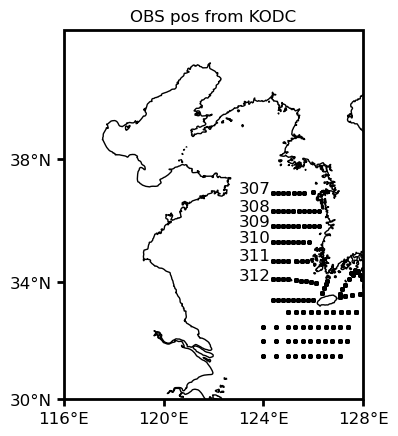

In [22]:
# %matplotlib
lon_bdy = [116,128];
lat_bdy = [30,42];
plt.rcParams['font.family'] = 'sans-serif'
fig = plt.figure()
ax = fig.add_subplot(projection = ccrs.Mercator())
for bnd in ax.spines.keys():
    ax.spines[bnd].set_linewidth('2')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color = 'k',zorder = 2,linewidth =1)
ax.add_feature(cfeature.LAND.with_scale('10m'),facecolor='w',zorder = -1)
ax.set_extent((lon_bdy[0],lon_bdy[-1],lat_bdy[0],lat_bdy[-1]),crs = ccrs.PlateCarree())
ax.set_xticks(np.arange(lon_bdy[0],lon_bdy[-1]+4,4),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat_bdy[0],lat_bdy[-1],4),crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',
                                degree_symbol='°',
                                dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f',
                                    degree_symbol='°')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.scatter(kodc_lon,kodc_lat,5,'k',transform = ccrs.PlateCarree(),)
ax.tick_params(direction = 'out',width =2,length=5, labelsize = 12,top = 0, right = 0)
ax.set_title('OBS pos from KODC',fontsize=12)
ax.text(123,36.9270379661017,'307',fontsize=12,transform = ccrs.PlateCarree(),)
ax.text(123,36.32999999999999,'308',fontsize=12,transform = ccrs.PlateCarree(),)
ax.text(123,35.855000000000004,'309',fontsize=12,transform = ccrs.PlateCarree(),)
ax.text(123,35.334999999999994,'310',fontsize=12,transform = ccrs.PlateCarree(),)
ax.text(123,34.7167,'311',fontsize=12,transform = ccrs.PlateCarree(),)
ax.text(123,34.054125058004644,'312',fontsize=12,transform = ccrs.PlateCarree(),)

In [139]:
data_thislon

array([11.7, 11.7, 11.7, 11.7, 11.7])

In [12]:
import matplotlib.pyplot as plt
var = 'SALT'
for irecord in np.unique(kodc_record):
    # print(irecord)
    
    this_record = np.where(kodc_record==irecord)
    line_thisrecord = np.unique(kodc_line[this_record])[0]
    lon_thisrecord = kodc_lon[this_record]
    time_thisrecord = kodc_time[this_record]
    time_begin = datetime.datetime(1970,1,1)+datetime.timedelta(np.min(time_thisrecord))
    time_end = datetime.datetime(1970,1,1)+datetime.timedelta(np.max(time_thisrecord))
    # print(np.unique(time_thisrcord))
    if var == 'TEMP':
        data_thisrecord = kodc_temp[this_record]
    elif var == 'SALT':
        data_thisrecord = kodc_salt[this_record]
    
    depth_thisrecord = kodc_depth[this_record]
    
    if len(np.unique(time_thisrecord)) >=2:
        fig, ax = plt.subplots()
        lon2d = np.zeros([len(np.unique(lon_thisrecord)),20])
        depth2d = np.zeros([len(np.unique(lon_thisrecord)),20])
        data2d = np.zeros([len(np.unique(lon_thisrecord)),20])
        for i,ilon in enumerate(np.unique(lon_thisrecord)):
            this_lon = np.where(lon_thisrecord==ilon)
            depth_thislon = depth_thisrecord[this_lon]
            # print(depth_thislon)
            data_thislon = data_thisrecord[this_lon]
            # print(data_thislon)
            refine_level = np.flipud(np.linspace(np.min(depth_thislon), np.max(depth_thislon),20))
            # print(refine_level)
            depth2d[i,:] = refine_level.copy()
            data2d[i,:] = np.interp(refine_level,depth_thislon,data_thislon)
            lon2d[i,:] = ilon



        cntr = ax.contourf(lon2d,-depth2d,data2d,levels=30,cmap='jet')
        ax.scatter(np.unique(lon_thisrecord),np.full_like(np.unique(lon_thisrecord),1),color='k')
        fig.colorbar(cntr, ax=ax)
        ax.set_title('%s line = %s time = \n%s~%s'%(var,str(int(line_thisrecord)),time_begin,time_end))
        ax.invert_yaxis
        fig.savefig('/Volumes/TO_1/roms4dvar_ecs/i4dvar_outputs/INSITU_OBS/profile_kodc/%s/%i_%i.jpeg'%(var,int(line_thisrecord),irecord),bbox_inches='tight',dpi=400)
        plt.close()